In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://www.geeksforgeeks.org/interactive-controls-in-jupyter-notebooks/#:~:text=specified.%20Finally%20decorate,Python3
https://forums.fast.ai/t/interactive-ipywidgets-tool-doesnt-show-in-kaggle/115179

In [2]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.9 MB/s eta 0:00:00


In [3]:
from fastai.vision.all import *
from fastai.tabular import *
from fastai.text.all import *
from fastbook import *

In [4]:
??search_images_ddg

In [5]:
from fastbook import *
urls = search_images_ddg('grizzly bear', max_images=200)
len(urls),urls[0]

(200, 'https://s3.wp.wsu.edu/uploads/sites/2797/2022/09/grizzly-bear-log.jpg')

In [6]:
dest = '/root/src/BigQuery_Helper/bears/grizzy/grizzly.jpg'
download_url(urls[0], dest)

Path('/root/src/BigQuery_Helper/bears/grizzy/grizzly.jpg')

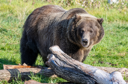

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
bear_types = 'grizzy','black','teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear',max_images=200)
        download_images(dest, urls=results)

In [9]:
fns = get_image_files(path)
fns

(#551) [Path('bears/teddy/eeba1491-f17f-4b97-ad29-8954a038e316.jpeg'),Path('bears/teddy/c743eee5-096a-43cd-92a2-b049016f1793.png'),Path('bears/teddy/7feeee93-0283-4c12-8f6b-d0f3bc031ae4.jpg'),Path('bears/teddy/7ea62283-03ad-4f8b-9a36-53595419b08a.jpg'),Path('bears/teddy/539d4001-92fc-410e-8a21-a51f2e957c6c.png'),Path('bears/teddy/0e5c5cfc-12b3-4a07-a43f-2426cc73848c.jpg'),Path('bears/teddy/635e55f1-2c82-44de-9ddc-102c67613f60.jpg'),Path('bears/teddy/f5f58ca7-d9c6-4e17-883b-efa03432bd3b.jpg'),Path('bears/teddy/aec7263e-729b-4edc-8cc3-ad199dfcc682.jpg'),Path('bears/teddy/b4062be2-18fc-46a9-a96e-44de23e06985.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#36) [Path('bears/teddy/18299d9f-8c21-4515-946a-bb51fac2219f.jpeg'),Path('bears/teddy/e3df47c4-e472-4919-92d7-e4ce7444579a.jpg'),Path('bears/teddy/cf25657d-f58f-4ee2-84e7-00788b5e38d4.jpg'),Path('bears/teddy/31150b72-6c3d-4887-9825-089403f95afd.jpg'),Path('bears/teddy/fcb7b14b-4d55-4651-bd62-ea4182a75b6f.jpg'),Path('bears/teddy/a698a2b0-9f55-4a6f-ab04-758ab748d218.jpg'),Path('bears/teddy/5bbd2e05-200b-432b-8731-522ad4883ca9.jpg'),Path('bears/teddy/f2c0bb20-0a65-490f-8b13-2511bf8b2cd1.jpg'),Path('bears/teddy/79d3919e-355b-4090-bef0-c7a56f795722.jpg'),Path('bears/teddy/a372a7fe-6b61-4989-8e86-14f7f9061ef1.jpg')...]

In [11]:
failed.map(Path.unlink);

In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

blocks = (ImageBlock, CategoryBlock)
* this above block is for specifing the independent and dependent variables

* here independent variable is ImageBlock and dependent variable is CategoryBlock.

get_items=get_image_files, 
* for the above one, dataloaders, our underlying images are there in the paths, lets give the path of the loaction of the files or images link this will give the images files (recursively)


* splitter = RandomSplitter(valid_pct = 0.2, seed =42)

* The independent variable is often referred to as x and the dependent variable is often referred to as y. Here, we are telling fastai what function to call to create the labels in our dataset:

* get_y = parent_label

* parent_label is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

* Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a mini-batch). To group them in a big array (usually called a tensor) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. Item transforms are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the Resize transform here:

* item_tfms = Resize(128)

*  This command has given us a DataBlock object. This is like a template for creating a DataLoaders. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

*  dls = bears.dataloaders(path)

In [13]:
dls = bears.dataloaders(path)

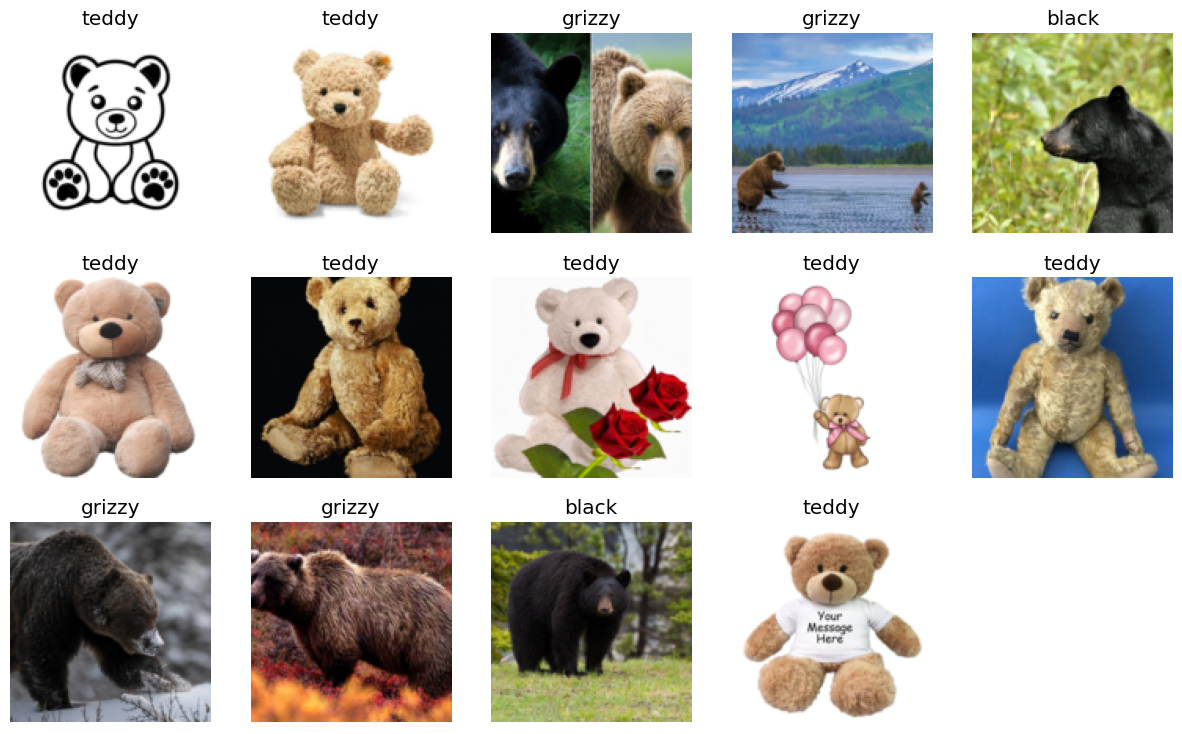

In [14]:
dls.valid.show_batch(max_n=14,nrows=3)



* By default Resize crops the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:


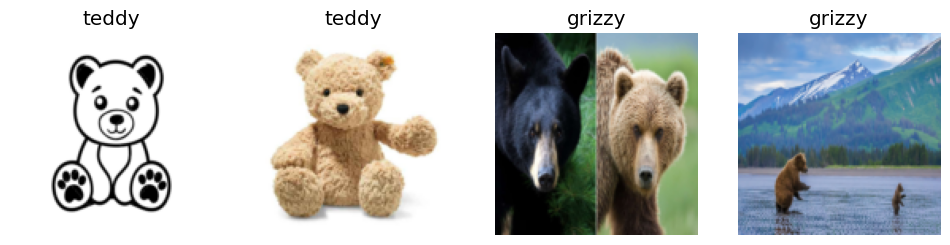

In [15]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

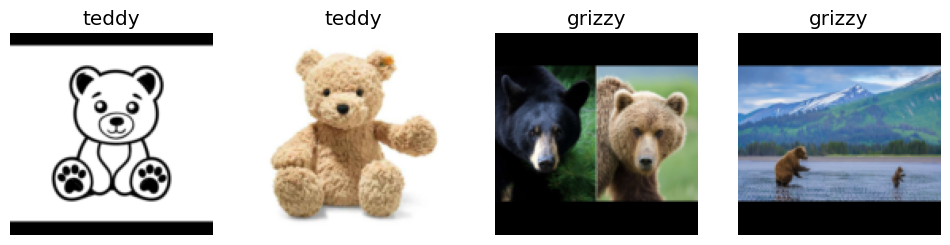

In [16]:
bears = bears.new(item_tfms=Resize(128,ResizeMethod.Pad,pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)



All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace Resize with RandomResizedCrop, which is the transform that provides the behavior we just described. The most important parameter to pass in is min_scale, which determines how much of the image to select at minimum each time:


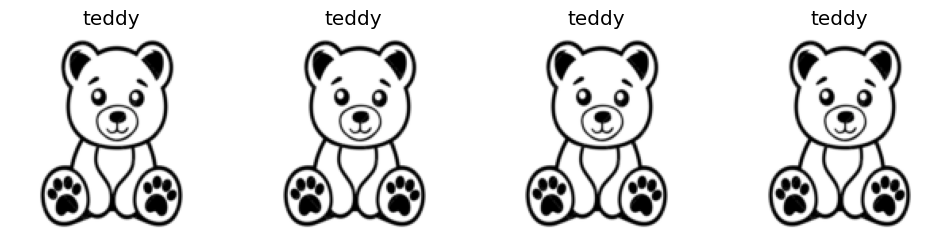

In [17]:
bears = bears.new(item_tfms = RandomResizedCrop(128,min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1,unique=True)

## Data Augmentation



Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the aug_transforms function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the batch_tfms parameter (note that we're not using RandomResizedCrop in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):


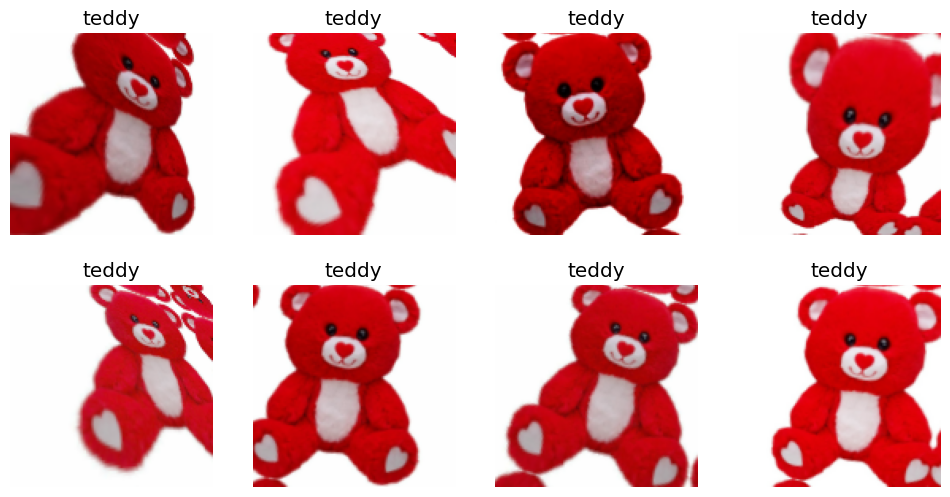

In [18]:
bears = bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)